In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Proyecto de tesis/Liver_GSE14520_U133A.csv')
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [3]:
non_label_samples=data.drop(columns=['samples','type'])
non_label_samples.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,3.654116,3.804983,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,5.137159,8.622475,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,4.515175,12.681439,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,5.192624,11.759412,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,4.961625,10.318552,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


## Distribución de expresión génica

Se uso un histograma de frecuencias para medir en que valor de expresión génica cae cada gen y así poder aproximar una distribución de probabilidad continua a los datos de entrada utilizando la libreria de Tensorflow Probability.

Se puede ver en la grafica un sesgo hacia valores de expresión bajos (entre 3 y 4), lo que significa que en general la mayoria de los genes en la mayoría de las muestras tienen su valor de expresión ahí, ahora bien, la cola que va de manera descendente nos puede hacer ver que los genes que se expresan más son bastante raros.

Si bien esto nos puede dar una visión global, no podemos saber con certeza que genes en especifico son más variables o no, por lo que otro enfoque podria ser ajustar la distribucion de las caracteristicas individualmente y calcular la probabilidad conjunta.

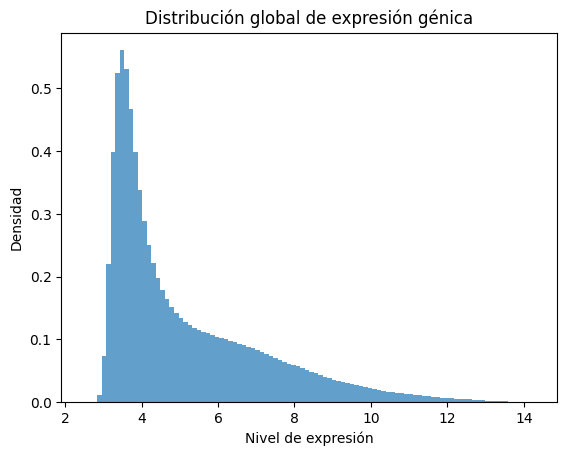

In [4]:
import matplotlib.pyplot as plt

valores = non_label_samples.values.flatten()
plt.hist(valores, bins=100, alpha=0.7, density=True)
plt.xlabel("Nivel de expresión")
plt.ylabel("Densidad")
plt.title("Distribución global de expresión génica")
plt.show()


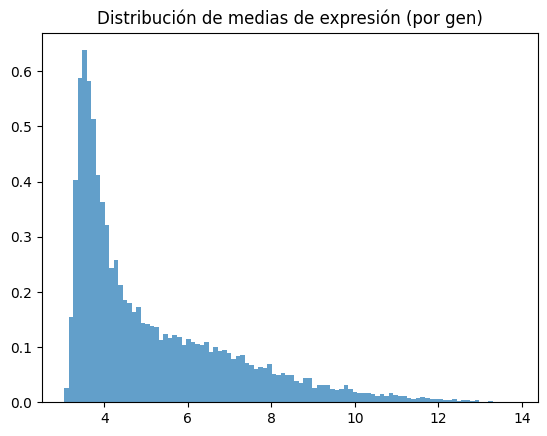

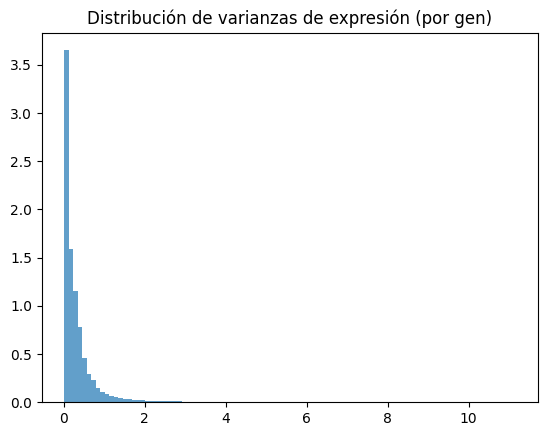

In [5]:
medias = non_label_samples.mean(axis=0)   # media por gen
varianzas = non_label_samples.var(axis=0) # varianza por gen

plt.hist(medias, bins=100, density=True, alpha=0.7)
plt.title("Distribución de medias de expresión (por gen)")
plt.show()

plt.hist(varianzas, bins=100, density=True, alpha=0.7)
plt.title("Distribución de varianzas de expresión (por gen)")
plt.show()


## Visualización de las primeras 30 caracteristicas

Un ejercicio que nos puede dar pistas acerca de el comportamiento de los genes es visualizar su distribución de probabilidad, en estas primeras 30 caracteristicas la mayoria de las muestras siguen una ditribución de probabilidad muy parecida a la normal, mientras que solo unas pocas tienen una distribución sesgada, esto puede sugerir que en general las muestras con distribucioes estrechas alrededor de el valor medio de expresión genica son menos informativas que las que tienen un sesgo hacia algun valor extremo.

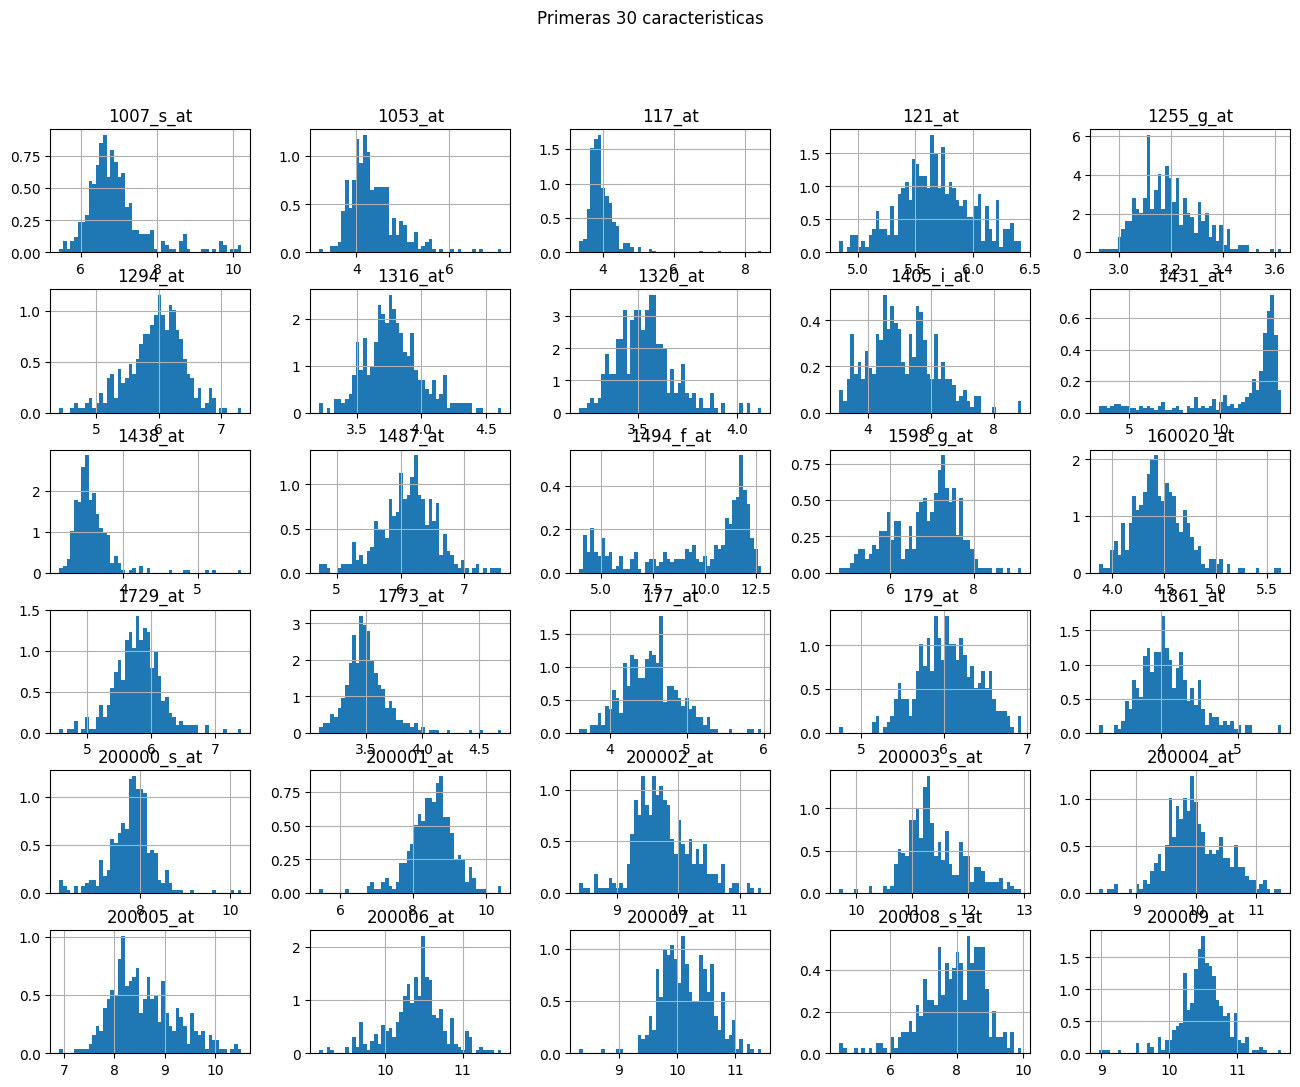

In [6]:
samples = non_label_samples.iloc[:, :30]

samples.hist(bins=50, figsize=(16,12), density=True)
plt.suptitle("Primeras 30 caracteristicas")
plt.show()